TensorNetwork with 0 nodes and 0 edges
TensorNetwork with 1 nodes and 0 edges
TensorNetwork with 2 nodes and 0 edges
TensorNetwork with 2 nodes and 1 edges


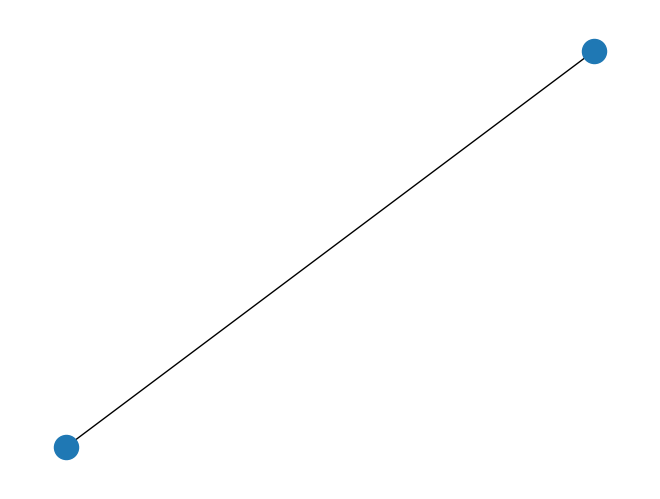

In [1]:
from qps.tensor import TensorNetwork
import numpy as np

G = TensorNetwork()
print(G)

ket_0 = np.array([1, 0])

first_tensor = G.add_tensor(ket_0)
print(G)
h = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
second_tensor = G.add_tensor(h)
print(G)

G.add_tensordot(first_tensor, second_tensor, 0, 1)
print(G)
import networkx as nx
nx.draw(G)

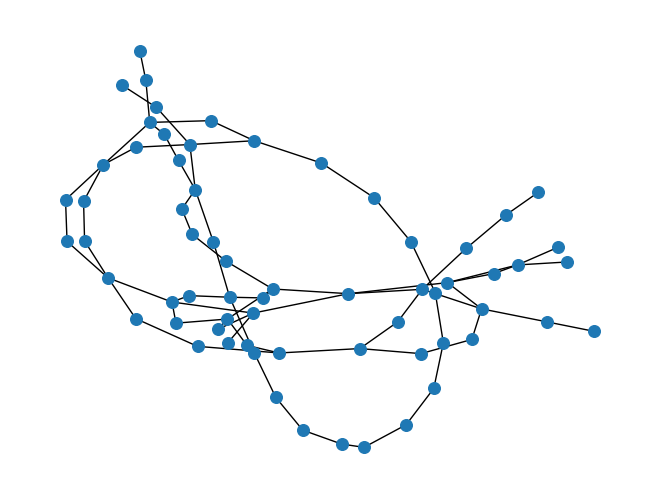

In [2]:
from qps.tensor import TensorContraction

from qps.circuits import generate_random_circuit, GATES

circuit = generate_random_circuit(5, 60)

sim = TensorContraction(5)
sim.simulate_circuit(circuit)
nx.draw(sim.network, node_size=70)

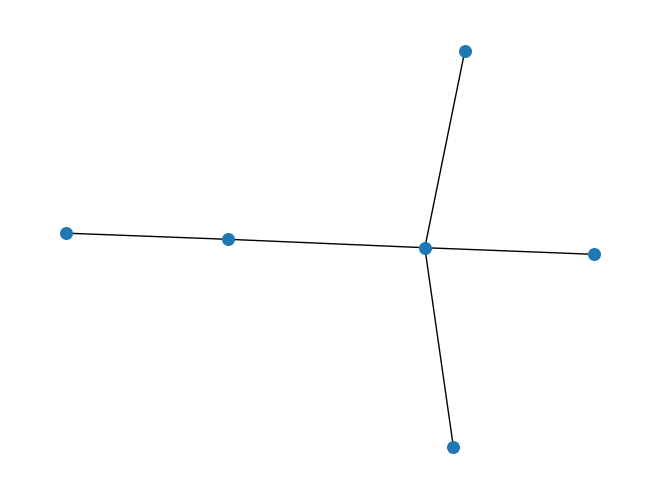

In [3]:
circuit = [(GATES['H'], [0]), (GATES['CNOT'], [0, 1])]
sim = TensorContraction(2)
sim.simulate_circuit(circuit)
sim.attach_end_projectors()
nx.draw(sim.network, node_size=70)

m,q,u,y,C,G,K,O,S,W,À,pm,Átpq,Âxtu,ÃBxy,ÄFBC,ÅJFG,ÆNJK,ÇRNO,ÈVRS,ÉZVW,ÊËZÀ,Á,Â,Ã,Ä,Å,Æ,Ç,È,É,Ê,Ë->


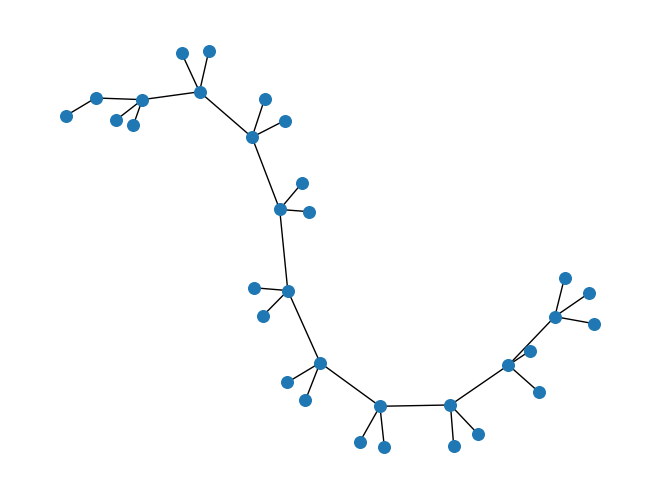

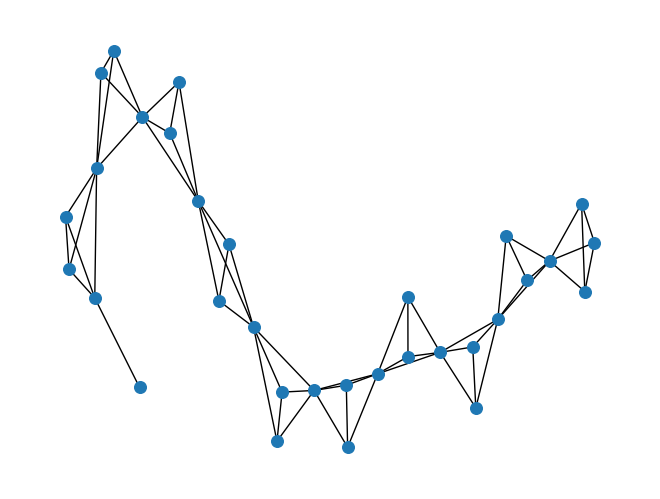

In [4]:
circuit = [(GATES['H'], [0])] + [(GATES["CNOT"], [i, i+1]) for i in range(10)]
sim = TensorContraction(11)
sim.simulate_circuit(circuit)
sim.attach_end_projectors()
nx.draw(sim.network, node_size=70)
print(sim.network.get_einsum_expression())
import matplotlib.pyplot as plt
plt.show()

line_graph = nx.line_graph(sim.network)
nx.draw(line_graph, node_size=70)
plt.show()


3


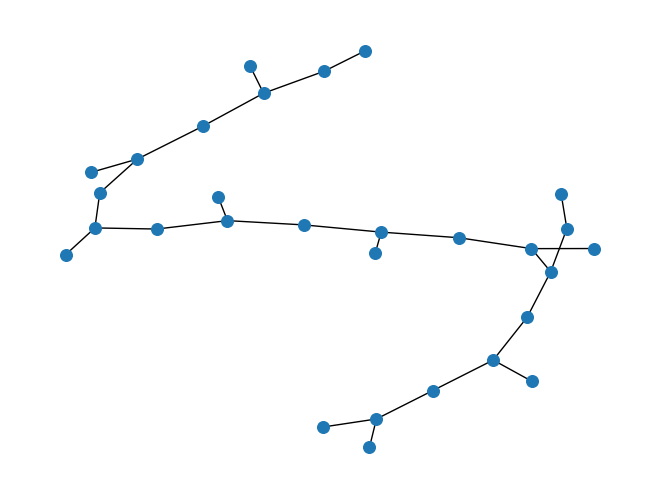

In [5]:
tree_width, tree_decomposition = nx.approximation.treewidth_min_degree(line_graph)

nx.draw(tree_decomposition, node_size=70)
print(tree_width)

In [6]:
print(tree_decomposition)

Graph with 29 nodes and 28 edges


In [7]:
for node in tree_decomposition.nodes():
    if tree_decomposition.degree(node) == 1:
        leaf = node
        break
print(leaf)

frozenset({(10, 21), (21, 32), (21, 31), (20, 21)})


In [8]:
parent = (list(tree_decomposition.neighbors(leaf))[0])
order = []
print(parent)
print(leaf - parent)
for edge in leaf - parent:
    order.append(edge)
# order.extend(leaf - parent)
print(order)
tree_decomposition.remove_node(leaf)

frozenset({(20, 30), (20, 21)})
frozenset({(10, 21), (21, 32), (21, 31)})
[(10, 21), (21, 32), (21, 31)]


In [9]:
for node in tree_decomposition.nodes():
    if tree_decomposition.degree(node) == 1:
        leaf = node
        break
print(leaf)

frozenset({(20, 30), (20, 21)})


In [10]:
print(sim.network)
print(sim.network.contract())

TensorNetwork with 33 nodes and 32 edges
(0.7071067811865475+0j)
